In [1]:
import numpy as np
# Plotting
import pandas as pd
from helpers_pd import *
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
sns.set()
# plt.style.use('seaborn-white')
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def facet_scatter(x, y, c, **kwargs):
    """Draw scatterplot with point colors from a faceted DataFrame columns."""
    kwargs.pop("color")
    plt.scatter(x, y, c=c, **kwargs)
    
sns.set(rc={'figure.figsize':(11.7,8.27)})

Want to constrain mobility in soils by outlet fit. 

Does the **variable model** allow us to see the constraint effects (on Kd and DT50), when constrained by the outlet? 


In [93]:
df1 = get_data(gen="Gen1")

In [94]:
df2 = get_data(gen="Gen2")
df1 = pd.concat([df1, df2])

In [ ]:
df3 = get_data(gen="Gen3")
# df4 = get_data(gen="Gen4")

In [96]:
df1['Gen'] = 'Gen1'
df3['Gen'] = 'Gen3'

In [97]:
df = pd.concat([df1, df3])

In [98]:
df['K_d'] = df.loc[:, 'k_oc'] * df.loc[:,'f_oc']
# Combined outlet and transects KGE Concentrations and d13C
df['KGE-SM'] = (df.loc[:, 'KGE-CONC_out'] + df.loc[:, 'KGE-CONC-tra'])/2.0  
df['KGE-d13C'] = (df.loc[:, 'KGE-d13C_out'] + df.loc[:, 'KGE-d13C-tra'])/2.0

isocst = 0.5
df['Constraint'] = df.apply(IsoKGE, args=(isocst,), axis=1)

In [99]:
print("Maximum Conc.")
print(df['KGE-CONC-tra'].max(), df['KGE-CONC_out'].max(), df['KGE-SM'].max()) 
print("Maximum d13C")
print(df['KGE-d13C-tra'].max(), df['KGE-d13C_out'].max(), df['KGE-d13C'].max()) 

Maximum Conc.
(0.8063209588708689, 0.38015755513726557, 0.5725395812686325)
Maximum d13C
(0.9031088875320538, 0.70432567774303, 0.7895610427604134)


In [100]:
dfs = df[['Model', 'K_d', 'dt_50_ref', 'k_oc', 'f_oc',
          'KGE-CONC-tra' , 
          'KGE-Q_out', 'KGE-CONC_out', 'KGE-LDS_out',
          'KGE-d13C-tra', 'KGE-d13C_out',
          'KGE-SM', 'KGE-d13C', 'Constraint', 
          'Gen'
         ]]

Filter for good concentrations

In [101]:
# Filter
ff = dfs.loc[(dfs['Gen']== "Gen1") & (dfs['KGE-SM'] > 0.45)] # Try 25 with more data points
ff_c = dfs.loc[(dfs['Gen']== "Gen3") & (dfs['KGE-SM'] > 0.4) & (dfs['KGE-d13C'] > isocst)]
print(len(dfs), len(ff), len(ff_c))

(11240, 66, 2)


Set color bar and axes ranges 

In [102]:
vmin, vmax = ff['KGE-SM'].min(), ff['KGE-SM'].max()
cmap = sns.diverging_palette(10, 240, l=65, center="light", as_cmap=True)
# cmap = sns.diverging_palette(275, 150, s=80, l=55, center="dark", as_cmap=True)

xmin, xmax = ff['dt_50_ref'].min() * .90, ff['dt_50_ref'].max() * 1.05
ymin, ymax = ff['K_d'].min() * 0.90, ff['K_d'].max() * 1.05

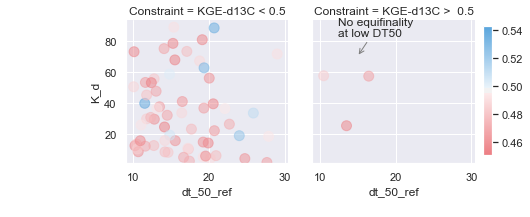

In [103]:
g = sns.FacetGrid(ff, col='Constraint', palette='viridis')
g = g.map(facet_scatter, 'dt_50_ref', 'K_d', "KGE-SM",
          s=100, alpha=0.5, vmin=vmin, vmax=vmax, cmap=cmap)

g.axes[0,0].set_ylim(ymin, ymax)
g.axes[0,1].set_ylim(ymin, ymax)
g.axes[0,0].set_xlim(xmin, xmax) # left plot
g.axes[0,1].set_xlim(xmin, xmax) # right plot

# Make space for the colorbar
g.fig.subplots_adjust(right=.92)

# Define a new Axes where the colorbar will go
cax = g.fig.add_axes([.94, .25, .02, .6])

# Get a mappable object with the same colormap as the data
points = plt.scatter([], [], c=[], vmin=vmin, vmax=vmax, cmap=cmap)

ax0 = g.axes[0, 0]
ax1 = g.axes[0, 1]

ax0.annotate('Kd vs DT50,\nequifinality',
            xy=(28, 170), xycoords='data',
            xytext=(-70, 40), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color='grey',
                            connectionstyle="arc3,rad=.6"))

ax1.annotate('No equifinality \nat low DT50', 
            xy=(15, 70), xycoords='data',
            xytext=(-20, 20), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color='grey'))

# Draw the colorbar
g.fig.colorbar(points, cax=cax)
# g.savefig("DT50vsKd_Fig1.pdf")

# https://matplotlib.org/examples/pylab_examples/annotation_demo2.html

## Using Joint Plot

In [83]:
ff.head(2)

,Model,K_d,dt_50_ref,k_oc,f_oc,KGE-CONC-tra,KGE-Q_out,KGE-CONC_out,KGE-LDS_out,KGE-d13C-tra,KGE-d13C_out,KGE-SM,KGE-d13C,Constraint,Gen
LHS_be1fix3/128/,fix,53.882385,14.321159,5052.896261,0.010664,0.640758,0.553092,0.198164,-0.817553,-1.0579,-1.299290,0.419461,-1.178595,KGE-d13C < 0.5,Gen1
LHS_be1fix3/26/,fix,24.736747,14.129402,914.582932,0.027047,0.646923,0.571050,0.255708,-2.013553,0.3570,-0.020789,0.451316,0.168105,KGE-d13C < 0.5,Gen1


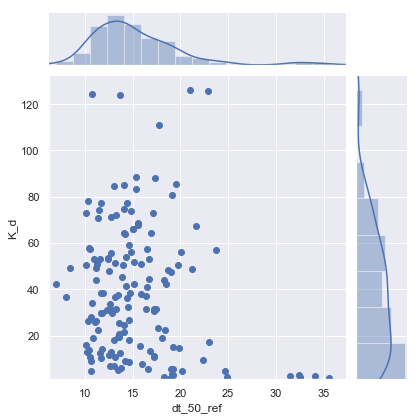

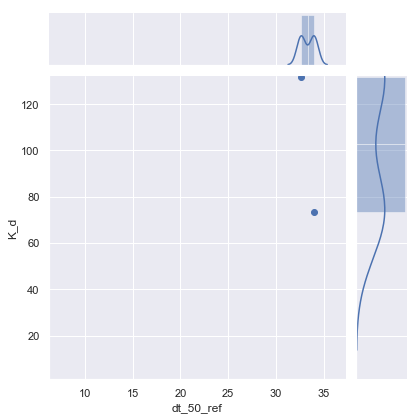

In [84]:
g = sns.JointGrid(x="dt_50_ref", y="K_d", data=ff, xlim=(xmin, xmax), ylim=(ymin,ymax))
g = g.plot(plt.scatter, sns.distplot)

g1 = sns.JointGrid(x="dt_50_ref", y="K_d", data=ff_c, xlim=(xmin, xmax), ylim=(ymin,ymax))
g1= g1.plot(plt.scatter, sns.distplot)

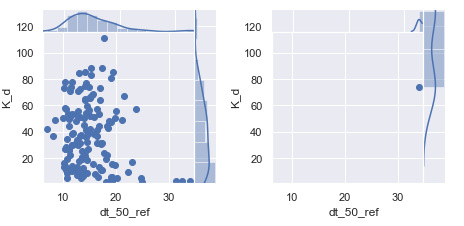

In [85]:
f = plt.figure()
for J in [g, g1]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)
        
f.axes[0].set_position([0.1, 0.1, 0.38, 0.4]) # Left scatter
f.axes[1].set_position([0.1, 0.45, 0.4, 0.05]) # Left-top hist
f.axes[2].set_position([0.45, 0.1, 0.05, 0.4]) # Left-bott hist, (x-start, y-start, with-x, with-y)
f.axes[3].set_position([0.63, 0.1, 0.38, 0.4]) # Right scatter
f.axes[4].set_position([0.63, 0.45, 0.4, 0.05]) # Top right hist
f.axes[5].set_position([0.98, 0.1, 0.05, 0.4]) # Right bott hist
# g.fig.axes

# test
# f.axes[0].set_position([0.1, 0.1, 1.48, 1.48]) # Left scatter

# f.axes[0].annotate('Kd vs DT50,\nequifinality',
#             xy=(28, 170), xycoords='data',
#             xytext=(-70, 40), textcoords='offset points',
#             arrowprops=dict(arrowstyle="->", color='grey',
#                             connectionstyle="arc3,rad=.6"))

# f.axes[1].set_position([0.1, 0.45, 0.4, 0.05]) # Left-top hist
# f.axes[2].set_position([0.45, 0.1, 0.05, 0.4]) # Left-bott hist, (x-start, y-start, with-x, with-y)
# f.axes[3].set_position([0.63, 0.1, 0.38, 0.4]) # Right scatter
# f.axes[4].set_position([0.63, 0.45, 0.4, 0.05]) # Top right hist
# f.axes[5].set_position([0.98, 0.1, 0.05, 0.4]) # Right bott hist


# f.savefig("JointGrid.pdf")